<a href="https://colab.research.google.com/github/pmisawa/GoogleColab/blob/main/Paradigmas_de_linguagem_Trilha_4_Tarefa_An%C3%A1lise_Explorat%C3%B3ria_de_Dados_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explory Data Analysis - Suicide Total Deaths

Número total de mortes estimadas por lesões autoinfligidas.

Escolhi esses dados no intuito de conscientizar você sobre a importância da companha Setembro Amarelo de prevenção ao suicídio, mostrando de maneira gráfica a quantidade de suicídios por ano no mundo, os índices de suicídio dos países mais populosos do mundo, o continente com o maior volume de suicídios e o continente com o menor volume, entre os anos de 1989 e 2018.

Fonte: [Institute for Health Metrics and Evaluation - IHME](https://www.healthdata.org/).

In [ ]:
# Para o dataframe
import pandas as pd

# Para remover letras do dataframe
import numpy as np

# Para os gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

In [ ]:
# Extraindo os dados
dados = pd.read_csv('/content/suicide_total_deaths.csv')
pd.set_option('display.max_columns', None) # Para visualizar todas as linhas do Dataframe
dados.head()

,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,696,751,855,943,993,1030,1070,1100,1110,1120,1140,1180,1190,1230,1280,1300,1300,1310,1330,1340,1370,1390,1410,1430,1440,1470,1500,1550,1580,1610
1,Angola,973,991,1020,1070,1110,1120,1080,1090,1160,1200,1220,1230,1220,1250,1310,1310,1350,1370,1400,1450,1500,1550,1600,1640,1650,1690,1720,1800,1870,1930
2,Albania,125,136,132,131,125,133,141,158,170,163,151,148,154,165,170,169,162,158,163,160,160,160,158,157,158,160,158,156,154,152
3,Andorra,5.96,6.46,6.81,7.25,7.24,7.11,7.09,7,6.97,6.9,6.89,6.87,6.91,7.29,7.68,7.74,7.95,8.04,8.12,8.1,8.08,7.46,7.28,7.29,7.49,7.56,7.63,7.81,7.98,8.13
4,United Arab Emirates,114,121,130,140,147,161,170,181,190,200,204,213,223,222,224,231,265,339,432,516,541,562,580,610,636,645,648,648,655,664


In [ ]:
dadosT = dados.transpose().reset_index() # Realizando a transposta dos dados e redefinindo os índices
dadosT.columns = dadosT.iloc[0] # Redefinido os nomes das colunas
dadosT.drop(0, inplace=True) # Excluindo a linha de índice 0
dadosT = dadosT.reset_index() # Redefinindo os índices
dadosT.drop(columns='index', inplace=True) # Excluindo a coluna index
novos_dados = dadosT.rename({'country':'year'}, axis=1) # Renomeando a coluna

In [ ]:
display(novos_dados.isna().sum()) # Se possui valores NaN
print('\n')
display(novos_dados.isnull().sum()) # Se possui valores Nulos
print('\n')
display(novos_dados.dtypes) # Tipo dos dados em cada coluna
print('\n')
display(novos_dados.shape) # Tamando do dataset

0
year            0
Afghanistan     0
Angola          0
Albania         0
Andorra         0
               ..
Samoa           0
Yemen           0
South Africa    0
Zambia          0
Zimbabwe        0
Length: 205, dtype: int64

0
year            0
Afghanistan     0
Angola          0
Albania         0
Andorra         0
               ..
Samoa           0
Yemen           0
South Africa    0
Zambia          0
Zimbabwe        0
Length: 205, dtype: int64

0
year            object
Afghanistan     object
Angola          object
Albania         object
Andorra         object
                 ...  
Samoa           object
Yemen           object
South Africa    object
Zambia          object
Zimbabwe        object
Length: 205, dtype: object

(30, 205)

In [ ]:
novos_dados.head()

,year,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,Bahamas,Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Cook Is,Colombia,Comoros,Cape Verde,Costa Rica,Cuba,Cyprus,Czech Republic,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,Ecuador,Egypt,Eritrea,Spain,Estonia,Ethiopia,Finland,Fiji,France,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,Gambia,Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,Honduras,Croatia,Haiti,Hungary,Indonesia,India,Ireland,Iran,Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,South Korea,Kuwait,Lao,Lebanon,Liberia,Libya,St. Lucia,Sri Lanka,Lesotho,Lithuania,Luxembourg,Latvia,Morocco,Monaco,Moldova,Madagascar,Maldives,Mexico,Marshall Islands,North Macedonia,Mali,Malta,Myanmar,Montenegro,Mongolia,Northern Mariana Islands,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,Namibia,Niger,Nigeria,Nicaragua,Niue,Netherlands,Norway,Nepal,Nauru,New Zealand,Oman,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Puerto Rico,North Korea,Portugal,Paraguay,Palestine,Qatar,Romania,Russia,Rwanda,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Somalia,Serbia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Seychelles,Syria,Chad,Togo,Thailand,Tajikistan,Tokelau,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Taiwan,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,1989,696,973,125,5.96,114,2760,105,3.05,1.35,2340,1860,224,615,2190,282,700,10.9k,1790,27.6,6.78,471,2340,7.44,3.82,390,9250,12.4,12.2,36.9,162,380,4090,1820,2550,215k,907,675,2900,302,3.12,1420,24.6,31.6,165,2260,42,2320,14.9k,21.7,3.14,1530,276,1410,486,1950,230,3540,473,5880,1630,78.2,15.1k,23.5,122,6240,314,772,353,42.7,91.5,49.6,439,4.63,52.1,447,21.6,193,168,1230,612,4240,6520,154k,370,3640,766,38.8,373,5170,34,123,24.2k,3380,1140,599,584,23.6,2.09,5030,42.2,450,129,124,166,8.52,6790,290,1160,76,812,1870,4.91,776,925,12.7,2700,9.28,192,477,19.9,2700,103,317,7.64,900,118,142,718,988,136,371,4330,194,0.35,1880,734,2690,2.18,474,65.2,7230,106,664,3130,2.36,125,6940,367,2880,1660,116,58.2,24.8,2400,46.4k,731,411,1260,548,455,70.5,202,574,3.04,513,2190,315,1.73,85.8,953,650,1890,86.7,5.99,292,356,200,7040,264,0.2,268,51.7,3.87,167,276,3050,1.83,1910,1770,935,11.8k,361,34k,1430,6.05,1050,7.44,5510,23.6,23.5,596,6730,584,1020
1,1990,751,991,136,6.46,121,2870,110,3.14,1.37,2360,1860,231,617,2190,292,700,10.3k,1820,28.8,7.14,549,2520,8.43,3.8,405,9150,12.5,12.3,35.8,178,395,4140,1880,2450,216k,966,716,3000,300,3.05,1510,25.4,33.5,168,2310,43,2230,15.1k,21.2,3.22,1470,281,1390,556,1890,229,3570,504,5910,1620,78.5,14.9k,24.1,125,6200,317,796,366,45.2,92.8,49.8,439,4.63,52,500,22.1,193,169,1200,594,4090,6620,159k,386,3670,854,38.6,409,5200,34.1,126,24.2k,3510,1190,614,594,24.3,2.04,5150,40.4,458,127,131,166,8.84,6420,288,1290,76.3,867,1910,4.92,815,933,12.3,2880,9.71,195,479,20.5,2770,107,342,7.98,899,118,143,747,990,142,375,4420,222,0.35,1900,720,2670,2.22,483,65.2,7610,111,640,3100,2.42,130,7480,369,2910,1690,117,58.2,25.8,2410,49.1k,775,429,1300,565,456,74.3,198,553,3.06,518,2210,316,1.79,91.9,933,645,1890,91.1,6.18,299,356,208,7580,267,0.19,271,50.1,3.88,166,292,3140,1.8,1880,1810,1030,12.9k,390,34k,1480,6.19,1150,7.53,5570,26.2,23.8,604,6920,623,1040
2,1991,855,1020,132,6.81,130,3070,128,3.22,1.41,2390,1830,272,619,2250,303,711,10.5k,1950,29.4,7.38,540,2770,8.96,3.66,421,9200,12.9,12.5,35,2

In [ ]:
# Função para remover o k
def removerK(coluna):
  if 'k' in coluna:
      if len(coluna) > 1:
          return float(coluna.replace('k', '')) * 1000
  elif 'K' in coluna:
      if len(coluna) > 1:
          return float(coluna.replace('K', '')) * 1000
  else:
    return coluna

In [ ]:
# Removendo k
for i in novos_dados.columns:
  novos_dados[i] = novos_dados[i].apply(removerK)

In [ ]:
# Alterando o tipo das colunas
for i in novos_dados.columns:
  if i != 'year':
    novos_dados[i] = novos_dados[i].astype('float64')

In [ ]:
novos_dados.dtypes

0
year             object
Afghanistan     float64
Angola          float64
Albania         float64
Andorra         float64
                 ...   
Samoa           float64
Yemen           float64
South Africa    float64
Zambia          float64
Zimbabwe        float64
Length: 205, dtype: object

In [ ]:
novos_dados.head(10)

,year,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,Bahamas,Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Cook Is,Colombia,Comoros,Cape Verde,Costa Rica,Cuba,Cyprus,Czech Republic,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,Ecuador,Egypt,Eritrea,Spain,Estonia,Ethiopia,Finland,Fiji,France,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,Gambia,Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,Honduras,Croatia,Haiti,Hungary,Indonesia,India,Ireland,Iran,Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,South Korea,Kuwait,Lao,Lebanon,Liberia,Libya,St. Lucia,Sri Lanka,Lesotho,Lithuania,Luxembourg,Latvia,Morocco,Monaco,Moldova,Madagascar,Maldives,Mexico,Marshall Islands,North Macedonia,Mali,Malta,Myanmar,Montenegro,Mongolia,Northern Mariana Islands,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,Namibia,Niger,Nigeria,Nicaragua,Niue,Netherlands,Norway,Nepal,Nauru,New Zealand,Oman,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Puerto Rico,North Korea,Portugal,Paraguay,Palestine,Qatar,Romania,Russia,Rwanda,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Somalia,Serbia,South Sudan,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Seychelles,Syria,Chad,Togo,Thailand,Tajikistan,Tokelau,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Taiwan,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,1989,696.0,973.0,125.0,5.96,114.0,2760.0,105.0,3.05,1.35,2340.0,1860.0,224.0,615.0,2190.0,282.0,700.0,10900.0,1790.0,27.6,6.78,471.0,2340.0,7.44,3.82,390.0,9250.0,12.4,12.2,36.9,162.0,380.0,4090.0,1820.0,2550.0,215000.0,907.0,675.0,2900.0,302.0,3.12,1420.0,24.6,31.6,165.0,2260.0,42.0,2320.0,14900.0,21.7,3.14,1530.0,276.0,1410.0,486.0,1950.0,230.0,3540.0,473.0,5880.0,1630.0,78.2,15100.0,23.5,122.0,6240.0,314.0,772.0,353.0,42.7,91.5,49.6,439.0,4.63,52.1,447.0,21.6,193.0,168.0,1230.0,612.0,4240.0,6520.0,154000.0,370.0,3640.0,766.0,38.8,373.0,5170.0,34.0,123.0,24200.0,3380.0,1140.0,599.0,584.0,23.6,2.09,5030.0,42.2,450.0,129.0,124.0,166.0,8.52,6790.0,290.0,1160.0,76.0,812.0,1870.0,4.91,776.0,925.0,12.7,2700.0,9.28,192.0,477.0,19.9,2700.0,103.0,317.0,7.64,900.0,118.0,142.0,718.0,988.0,136.0,371.0,4330.0,194.0,0.35,1880.0,734.0,2690.0,2.18,474.0,65.2,7230.0,106.0,664.0,3130.0,2.36,125.0,6940.0,367.0,2880.0,1660.0,116.0,58.2,24.8,2400.0,46400.0,731.0,411.0,1260.0,548.0,455.0,70.5,202.0,574.0,3.04,513.0,2190.0,315.0,1.73,85.8,953.0,650.0,1890.0,86.7,5.99,292.0,356.0,200.0,7040.0,264.0,0.20,268.0,51.7,3.87,167.0,276.0,3050.0,1.83,1910.0,1770.0,935.0,11800.0,361.0,34000.0,1430.0,6.05,1050.0,7.44,5510.0,23.6,23.5,596.0,6730.0,584.0,1020.0
1,1990,751.0,991.0,136.0,6.46,121.0,2870.0,110.0,3.14,1.37,2360.0,1860.0,231.0,617.0,2190.0,292.0,700.0,10300.0,1820.0,28.8,7.14,549.0,2520.0,8.43,3.80,405.0,9150.0,12.5,12.3,35.8,178.0,395.0,4140.0,1880.0,2450.0,216000.0,966.0,716.0,3000.0,300.0,3.05,1510.0,25.4,33.5,168.0,2310.0,43.0,2230.0,15100.0,21.2,3.22,1470.0,281.0,1390.0,556.0,1890.0,229.0,3570.0,504.0,5910.0,1620.0,78.5,14900.0,24.1,125.0,6200.0,317.0,796.0,366.0,45.2,92.8,49.8,439.0,4.63,52.0,500.0,22.1,193.0,169.0,1200.0,594.0,4090.0,6620.0,159000.0,386.0,3670.0,854.0,38.6,409.0,5200.0,34.1,126.0,24200.0,3510.0,1190.0,614.0,594.0,24.3,2.04,5150.0,40.4,458.0,127.0,131.0,166.0,8.84,6420.0,288.0,1290.0,76.3,867.0,1910.0,4.92,815.0,933.0,12.3,2880.0,9.71,195.0,479.0,20.5,2770.0,107.0,342.0,7.98,899.0,118.0,1

# Qual a quantidade de suicídios por ano?

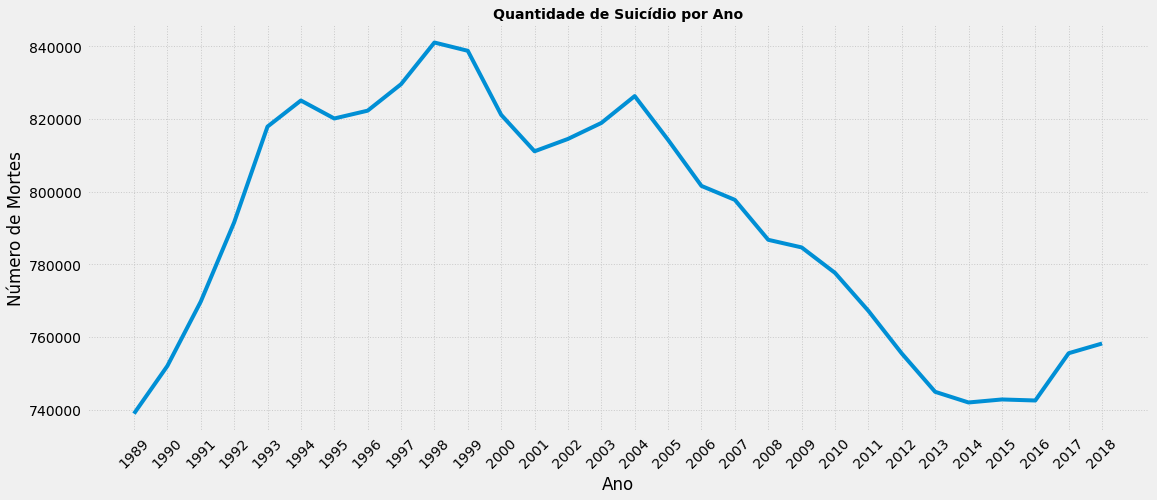

In [ ]:
df = novos_dados.iloc[:,1::]
listaAno = list(novos_dados.year)

totalAno = {}
somaAno = []

# Destacando os valores das linhas
for i in range(len(listaAno)):
  somaAno.append(df.iloc[i].values.sum())

# Adicionando as listas em um dicionário
for i in range(len(listaAno)):
  totalAno[listaAno[i]] = somaAno[i]

dicionario = {}
dicionario['Ano'] = list(totalAno.keys())
dicionario['Qntd'] = list(totalAno.values())
df = pd.DataFrame(dicionario, columns=['Ano','Qntd'])

# Gráfico de linha
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,7))
plt.grid(linestyle=':')
sns.lineplot(x=df.Ano, y=df.Qntd, alpha=1)
plt.autoscale(enable=True)
plt.title('Quantidade de Suicídio por Ano', fontsize=14, weight='bold')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=45)
plt.show()

De acordo com a Institute for Heath Metrics and Evaluation (IHME), desde o começo do registro dos dados, o número de suicídios no mundo aumentaram, onde registrou-se a primeira queda no ano de 1994, mas voltando a crescer a partir do ano seguinte e tendo seu maior pico de mortes por suicídio em 1998, ultrapassando a marca de 841 mil mortes. 

Após o registro histórico, o ano de 2001 apresentou a maior queda em 6 anos chegando a 811 mil mortes e voltando a crescer nos 3 anos seguintes. Desde então, os números melhoraram significativamente, registrando a sua queda histórica em 2016 com 742 mil mortes e alertando para os dois próximos anos.

# Quais os índices de suicídio dos países mais populosos do mundo? (China, Índia, EUA, Indonésia e Paquistão)

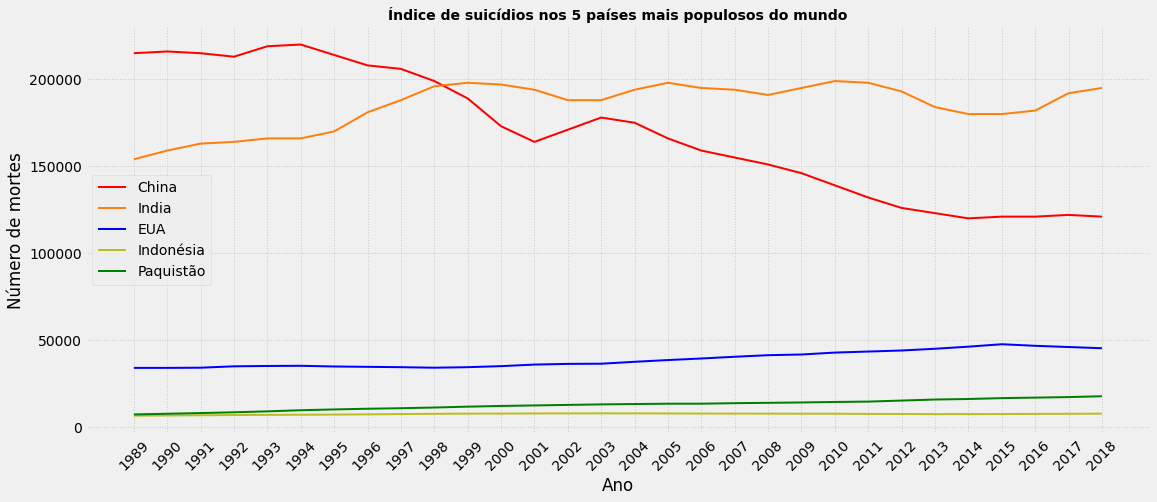

In [ ]:
fig, ax = plt.subplots(figsize=(17,7))
plt.style.use('bmh')
plt.grid(linestyle=':')

ax.plot(novos_dados.year, novos_dados.China, label='China', alpha=1, color='r')
ax.plot(novos_dados.year, novos_dados.India, label='India', alpha=1, color='tab:orange')
ax.plot(novos_dados.year, novos_dados['United States'], label='EUA', alpha=1, color='b')
ax.plot(novos_dados.year, novos_dados.Indonesia, label='Indonésia', alpha=1, color='tab:olive')
ax.plot(novos_dados.year, novos_dados.Pakistan, label='Paquistão', alpha=1, color='g')

ax.set_title('Índice de suicídios nos 5 países mais populosos do mundo', fontsize=14, weight='bold')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de mortes')
ax.legend()

plt.xticks(rotation=45)
plt.show()

De acordo com o gráfico, China e Índia por serem os dois países mais populosos do globo, indicam o maior volume de suicídios. A China teve um aumento dos índices até o ano de 1994, chegando a 220 mil mortes e caindo consideravelmente nos anos seguintes. A Índia, por sua vez, apresenta um aumento do começo ao fim dos registros, ultrapassando a China em 1999 com um número de quase 200 mil mortes, não indicando uma piora significativa. 

Já EUA e Indonésia apresentam um pequeno aumento, enquanto Paquistão se mostra com dados estáveis, sem indicar uma melhora ou piora.

# Qual é o continente com o maior volume de suicídios? E o continente com o menor volume?

In [ ]:
# Separando os países por continentes
america_central = novos_dados[['Bermuda','Belize','Costa Rica','El Salvador','Guatemala','Honduras','Nicaragua','Panama','Antigua and Barbuda','Bahamas','Barbados','Cuba','Dominica','Dominican Republic','Grenada','Haiti','Jamaica','St. Lucia','St. Kitts and Nevis','St. Vincent and the Grenadines','Trinidad and Tobago','Puerto Rico','Virgin Islands (U.S.)']]
america_sul = novos_dados[['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay', 'Venezuela']]
america_norte = novos_dados[['Canada','United States','Mexico']]
africa = novos_dados[["Cote d'Ivoire",'South Africa','Angola','Algeria','Benin','Botswana','Burkina Faso','Burundi','Cameroon','Chad','Djibouti','Egypt','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Equatorial Guinea','Madagascar','Cape Verde','Comoros','Sao Tome and Principe','Seychelles','Lesotho','Liberia','Libya','Malawi','Mali','Morocco','Mauritania','Mozambique','Namibia','Niger','Nigeria','Kenya','Central African Republic','Congo, Dem. Rep.','Congo, Rep.','Mauritius','Rwanda','Senegal','Sierra Leone','Somalia','Eswatini','Sudan','South Sudan','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe']]
asia = novos_dados[['Lao','Kyrgyz Republic','Afghanistan','Saudi Arabia','Armenia','Azerbaijan','Bahrain','Bangladesh','Brunei','Bhutan','Cambodia','Qatar','China','Singapore','North Korea','South Korea','United Arab Emirates','Philippines','Georgia','Yemen','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kuwait','Lebanon','Malaysia','Maldives','Myanmar','Mongolia','Nepal','Oman','Pakistan','Russia','Syria','Sri Lanka','Tajikistan','Thailand','Turkmenistan','Turkey','Uzbekistan','Vietnam','Palestine','Timor-Leste','Taiwan']]
europa = novos_dados[['Albania','Germany','Andorra','Austria','Belgium','Belarus','Bosnia and Herzegovina','Bulgaria','Kazakhstan','Cyprus','Croatia','Denmark','Slovak Republic','Slovenia','Spain','Estonia','Finland','France','Greece','Hungary','Ireland','Iceland','Italy','Latvia','Lithuania','Luxembourg','Malta','Moldova','Monaco','Montenegro','Norway','Netherlands','Poland','Portugal','Czech Republic','North Macedonia','United Kingdom','Romania','San Marino','Serbia','Sweden','Switzerland','Ukraine']]
oceania = novos_dados[['Guam','Cook Is','American Samoa','Australia','Micronesia, Fed. Sts.','Fiji','Marshall Islands','Solomon Islands','Kiribati','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Tonga','Tuvalu', 'Vanuatu','Northern Mariana Islands','Tokelau']]
groenlandia = novos_dados[['Greenland']]

In [ ]:
# Somando as mortes dos países do continente por ano
ano = list(novos_dados.year.values)
ameCen = []
ameNor = []
ameSul = []
asialist = []
euro = []
afri = []
ocean = []
groen = []

for i in range(0,len(america_central)):
   ameCen.append(america_central.iloc[i].sum())
   ameNor.append(america_norte.iloc[i].sum())
   ameSul.append(america_sul.iloc[i].sum())
   asialist.append(asia.iloc[i].sum())
   euro.append(europa.iloc[i].sum())
   afri.append(africa.iloc[i].sum())
   ocean.append(oceania.iloc[i].sum())
   groen.append(groenlandia.iloc[i].sum())

continentes = pd.DataFrame({'Ano':ano, 'America Central':ameCen,'America Norte':ameNor,
                            'America Sul':ameSul,'Asia':asialist, 'Europa':euro,
                            'Africa':afri,'Oceania':ocean, 'Groenlândia':groen})

ameCenTot = continentes[['America Central']].sum()
ameNorTot = continentes[['America Norte']].sum()
ameSulTot = continentes[['America Sul']].sum()
asiaTot = continentes[['Asia']].sum()
euroTot = continentes[['Europa']].sum()
afriTot = continentes[['Africa']].sum()
oceanTot = continentes[['Oceania']].sum()
groelTot = continentes[['Groenlândia']].sum()

In [ ]:
# Criando o gráfico de mapa
mapa = folium.Map(location=[0.0, 0.0],
                  zoom_start=2,
                  tiles='OpenStreetMap')

folium.Circle(
    radius=700000,
    location=[-17.32083702890929, -57.247544896160214],
    popup="<i>América do Sul com 780.544 Mil</i>",
    color="green",
    fill=True,
    tooltip='Clique para ver os detalhes').add_to(mapa)

folium.Circle(
    radius=300000,
    location=[12.198741434268346, -85.37254473952882],
    popup="<i>América Central com 184.694 Mil</i>",
    color="yellow",
    fill=True,
    tooltip='Clique para ver os detalhes').add_to(mapa)

folium.Circle(
    radius=800000,
    location=[48, -102],
    popup="<i>América do Norte com 1.460.830 Milhão</i>",
    color="blue",
    fill=True,
    tooltip='Clique para ver os detalhes').add_to(mapa)

folium.Circle(
    radius=50000,
    location=[66.03881366440447, -44.87904384484402],
    popup="<i>Groenlândia com 1363 Mil</i>",
    color="pink",
    fill=True,
    tooltip='Clique para ver os detalhes').add_to(mapa)

folium.Circle(
    radius=1200000,
    location=[52.78661560749805, 23.824737016960196],
    popup="<i>Europa com 3.054.549 Milhões</i>",
    color="purple",
    fill=True,
    tooltip='Clique para ver os detalhes').add_to(mapa)

folium.Circle(
    radius=3200000,
    location=[47.13826131791401, 99.60211457413058],
    popup="<i>Asia com 16.223.494 Milhões</i>",
    color="red",
    fill=True,
    tooltip='Clique para ver os detalhes').add_to(mapa)

folium.Circle(
    radius=1300000,
    location=[-1.4328019860802115, 22.066924516960196],
    popup="<i>Africa com 1.893.772 Milhão</i>",
    color="brown",
    fill=True,
    tooltip='Clique para ver os detalhes').add_to(mapa)

folium.Circle(
    radius=200000,
    location=[-7.040168749692714, 130.17239285971866],
    popup="<i>Oceania com 111.041 Mil</i>",
    color="orange",
    fill=True,
    tooltip='Clique para ver os detalhes').add_to(mapa)

mapa

Vemos aqui, que o número de mortes por suicídio levantado em cada continente nos últimos 29 anos, possui forte correlação com a quantidade de habitantes por continente. O continente asiático lidera com um volume de 16 milhões de mortes dentro desse período, um número cinco vezes maior que na Europa, com a segunda maior concentração, onde há um pouco mais de 3 milhões. A população da Ásia, até 2018, era de 4 bilhões, enquanto na Europa, 513 milhões.

A região do globo com o menor volume de mortes por suicídio é a Groenlândia com um índice de 1366 mortes e com uma população de 56 mil habitantes. Apesar dessa coincidência, friso aqui que a correlação não implica causalidade, ou seja, não necessariamente isso está diretamente ligado ao motivo dessas mortes.






# Conclusão

Os dados levantados pelo [Institute for Health Metrics and Evaluation - IHME](https://www.healthdata.org/) mostram números impressionantes, números esses somente entre o ano 1989 e 2018, não chegando até o cenário pandêmico que vivenciamos nos últimos anos. Estudos levantados em 2021 mostram que, por ano, há 16 milhões de pessoas no mundo que tentam se suicidar. “No Brasil, acontece uma morte por suicídio a cada 45 minutos, mas para cada morte temos outras 20 tentativas. Os números são altos e preocupantes”, diz o psiquiatra Humberto Muller, de Rondônia.

Segundo Muller, *“4% dos adolescentes brasileiros apresentam sinais depressivos e 1 a cada 4 crianças já apresentou indícios da doença”*. De acordo com a Organização Mundial da Saúde (OMS), 90% dos casos de suicídio podem ser evitados e um dos meios de prevenção pode ser através de uma simples conversa.

Há diversas maneiras de identificar se uma pessoa está com pensamentos suicidas:

1. Pensamentos: Pensamentos remoídos obsessivamente, sem esperança e concentração são um dos primeiros indícios, assim como enxergar a vida como algo sem sentido ou propósito;
2. Humor: Alterações extremas no humor podem sinalizar emoções suicidas. Excesso de raiva, sentimento de vingança, ansiedade, irritabilidade e sentimentos intensos de culpa ou vergonha são sinais aos quais você deve ficar atento;
3. Avisos: Frases como “a vida não vale a pena”, “estou tão sozinho que queria morrer” ou “você vai sentir a minha falta” estão diretamente ligadas a pensamentos sobre a morte. Se a pessoa se sente um fardo, busque ajuda;
4. Melhora súbita: Geralmente a ideia de suicídio está ligada a um sentimento de que a pessoa está no fundo poço. A felicidade súbita pode ser um sinal de que a pessoa já aceitou a decisão de encerrar a própria vida. Caso você perceba uma melhora repentina, busque ajuda imediatamente;
5. Desapego: Caso você perceba que a pessoa está começando a “fechar pontas soltas”, doar seus pertences e até visitar vários entes queridos, faça uma intervenção o mais rápido possível;
6. Irresponsabilidade: Comportamentos irresponsáveis e perigosos, sem medir as consequências, como o uso excessivo de álcool e drogas, direção imprudente e sexo sem proteção são indícios de que a pessoa já não dá a importância devida a própria vida;
7. Mudança na rotina Todo mundo tem um lugar que gosta de frequentar em especial, então repare em mudanças extremas na rotina. Caso a pessoa pare de ir a locais que sempre gostou de visitar, tome uma medida o mais rápido possível. Abandonar atividades que lhe davam prazer é um grande sinal de alerta.

Se você está ou conhece alguém que esteja com esses comportamentos, busque ajuda através do número 188 (Centro de Valorização da Vida - CVV), um canal que realiza apoio emocional e prevenção do suicídio, atendendo voluntária e gratuitamente todas as pessoas que querem e precisam conversar, sob total sigilo por telefone, email e chat 24 horas todos os dias.


# [**Diálogos salvam vidas! Disque 188 (Centro de Valorização da Vida - CVV)**](https://www.cvv.org.br/)

# Bibliografia




*   **"Número total de mortes estimadas por lesões autoinfligidas"**. *Gapminder*. Disponível em: [gapminder.org](https://www.gapminder.org/). Acesso: 3 de Setembro, 2022.

*   **"Número de suicídios no Brasil e no mundo é preocupante, diz psiquiatra"**. *Agência Câmara de Notícias*. 20 de Outubro, 2022. Disponível em: <https://www.camara.leg.br/noticias/818779-numero-de-suicidios-no-brasil-e-no-mundo-e-preocupante-diz-psiquiatra/>. Acesso: 24 de Setembro, 2022.

*   **"7 sinais de comportamentos suicidas que você pode identificar"**. *TCR Medicina Diagnóstica*. Disponível em: <https://www.tcrclinica.com.br/noticias/7-sinais-de-comportamentos-suicidas-que-voce-pode-identificar>. Acesso: 24 de Setembro, 2022.